# Experiments with synthetic data
Configuration:
- 2 features
- 100 subjects
- bias varying from 0 to 10

Model:
- linear: 1 linear layer 
- 1layer: 1 conv layer (16) with spiral len 1 (no context), 1 linear layer
- 1layer_5spiral: 1 conv layer (16) with spiral len 5, 1 linear layer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from meld_graph.paths import EXPERIMENT_PATH
import os
#import seaborn as sns
from meld_graph.experiment import Experiment, discover_trained_experiments

Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1
Setting MELD_DATA_PATH to /home/co-spit1/meld_data
Setting BASE_PATH to /home/co-spit1/meld_data
Setting EXPERIMENT_PATH to /home/co-spit1/meld_experiments/co-spit1
Setting FS_SUBJECTS_PATH to /home/co-spit1/meld_data/output/fs_outputs


### define plotting fns

In [2]:
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)
            
def plot_scores(exps, score='loss', split='val', ax=None, title_prefix=''):
    # expects exps to be dict
    scores = []
    if ax is None:
        fig, ax = plt.subplots(1,1)
    for n, exp in sorted(exps.items(), key=lambda item: item[0]):
        scores = exp.get_scores(split=split)[score]
        ax.plot(scores.index, scores, label=n)
    ax.set_xlabel('epochs')
    ax.set_ylabel(score)
    ax.set_title(f'{title_prefix} {split} {score}')
    ax.legend()

### load data

In [3]:
model_base_paths = {
    'linear': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_linear_synthetic_data$bias',
    '1layer': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_1layer_synthetic_data$bias',
    '1layer_5spiral': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_1layer_5spiral_synthetic_data$bias',
    '1layer_7spiral': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_1layer_7spiral_synthetic_data$bias',
}

# get list of trained experiments
model_paths = {}
for name, path in model_base_paths.items():
    model_paths[name] = discover_trained_experiments(path)
print(model_paths)

# process paths to get nice descriptive model names and load experiments
models_dict = {}
for name, exp_list in model_paths.items():
    name_dict = {}
    for path in exp_list:
        exp_name = path.split('/')[-2].split('$')[-1]
        name_dict[exp_name] = Experiment.from_folder(path)
    models_dict[name] = name_dict
print(models_dict)

{'linear': ['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_linear_synthetic_data$bias/synthetic_data$bias_1/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_linear_synthetic_data$bias/synthetic_data$bias_0.5/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_linear_synthetic_data$bias/synthetic_data$bias_2/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_linear_synthetic_data$bias/synthetic_data$bias_0/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_linear_synthetic_data$bias/synthetic_data$bias_5/fold_00'], '1layer': ['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_1layer_synthetic_data$bias/synthetic_data$bias_10/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-06-27_synth_1layer_synthetic_data$bias/synthetic_data$bias_1/fold_00', '/rds/project/kw350/r

In [4]:
# available scores
models_dict['linear']['bias_0'].get_scores(split='val')

,loss,dice_lesion,dice_nonlesion,precision,recall,tp,fp,fn,tn
0,0.051311,9.930467e-02,0.299929,0.053554,0.821220,1442060,25485190,313938,5527212
1,0.037179,9.896619e-02,0.351122,0.053553,0.783873,1376480,24326850,379518,6685552
2,0.028522,9.834427e-02,0.426981,0.053548,0.723702,1270820,22461483,485178,8550919
3,0.023258,9.725167e-02,0.522914,0.053526,0.637882,1120120,19806347,635878,11206055
4,0.019836,9.545191e-02,0.629644,0.053531,0.527531,926343,16378522,829655,14633880
...,...,...,...,...,...,...,...,...,...
395,0.008381,8.285567e-20,0.972299,NaN,0.000000,0,0,1755998,31012402
396,0.008380,8.285567e-20,0.972299,NaN,0.000000,0,0,1755998,31012402
397,0.008381,8.285567e-20,0.972299,NaN,0.000000,0,0,1755998,31012402
398,0.008380,8.285567e-20,0.972299,NaN,0.000000,0,0,1755998,31012402


### plot data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


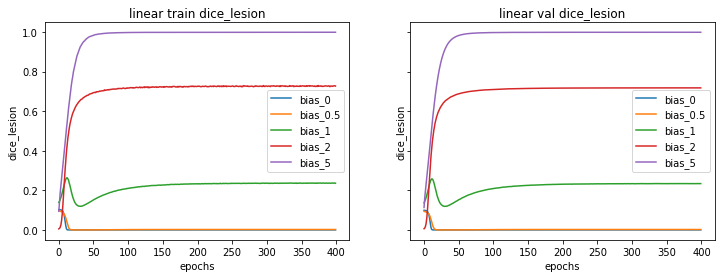

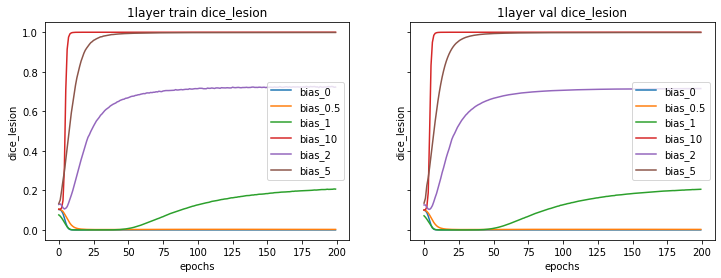

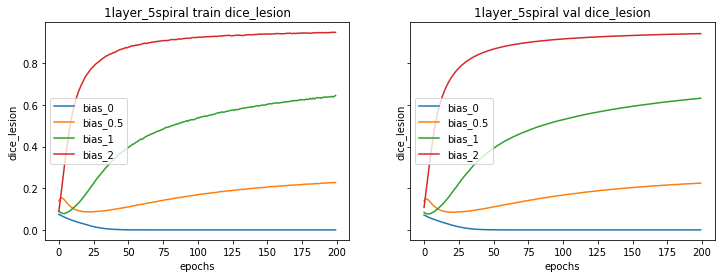

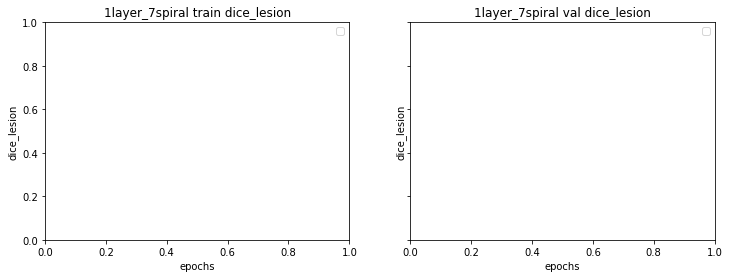

In [6]:
# linear model
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['linear'], 'dice_lesion', split='train', ax=axes[0], title_prefix='linear')
plot_scores(models_dict['linear'], 'dice_lesion', split='val', ax=axes[1], title_prefix='linear')

# 1layer model
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['1layer'], 'dice_lesion', split='train', ax=axes[0], title_prefix='1layer')
plot_scores(models_dict['1layer'], 'dice_lesion', split='val', ax=axes[1], title_prefix='1layer')

# 1layer model spiral 5
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['1layer_5spiral'], 'dice_lesion', split='train', ax=axes[0], title_prefix='1layer_5spiral')
plot_scores(models_dict['1layer_5spiral'], 'dice_lesion', split='val', ax=axes[1], title_prefix='1layer_5spiral')

# 1layer model spiral 7
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['1layer_7spiral'], 'dice_lesion', split='train', ax=axes[0], title_prefix='1layer_7spiral')
plot_scores(models_dict['1layer_7spiral'], 'dice_lesion', split='val', ax=axes[1], title_prefix='1layer_7spiral')